# Lab | Handling Data Imbalance in Classification Models

In [349]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [350]:
churnData = pd.read_csv('files_for_lab/Customer-Churn.csv')

In [351]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


### Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.

In [352]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [353]:
churnData['TotalCharges'].value_counts(dropna=False)

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [354]:
churnData['TotalCharges'] = churnData['TotalCharges'].replace(" ", "")

In [355]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'])

In [356]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [357]:
churnData['TotalCharges'].value_counts(dropna=False)

NaN        11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

C:\Users\franc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


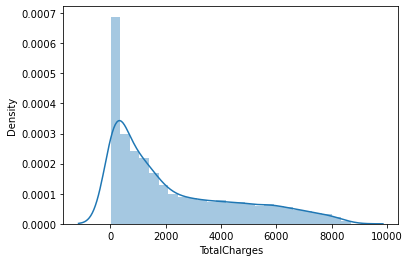

In [358]:
sns.distplot(churnData[churnData['TotalCharges'].isna()==False]['TotalCharges']) 
plt.show()

In [359]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(0)

- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Scale the features either by using normalizer or a standard scaler.
  - Split the data into a training set and a test set.
  - Fit a logistic regression model on the training data.
  - Check the accuracy on the test data.

In [360]:
churn = churnData.copy()

In [361]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [362]:
churn = churn.drop(['gender', 'Partner', 'Dependents',
        'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'Churn'], axis = 1)

In [363]:
churn

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [364]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [365]:
X = churn
y = np.where(churnData['Churn'] == 'Yes', 1, 0)

In [371]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.4,
    random_state=59
)

In [372]:
X_train_scaled = scaler.fit_transform(X_train)

In [373]:
X_test_scaled = scaler.transform(X_test)

In [374]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=3, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_scaled, y_train)

In [375]:
predictions = classification.predict(X_test_scaled)
classification.score(X_test_scaled, y_test)

0.801277501774308

**Note**: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.


In [376]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [377]:
churn['Churn'] = y

In [378]:
churn

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [379]:
from sklearn.utils import resample

category_0 = churn[churn['Churn'] == 0]
category_1 = churn[churn['Churn'] == 1]

### Downsampling

In [380]:
category_0_undersampled = resample(category_0, 
                                   replace=False, 
                                   n_samples = len(category_1))

In [381]:
print(category_0_undersampled.shape)
print(category_1.shape)

(1869, 5)
(1869, 5)


In [382]:
churn_downsampled = pd.concat([category_0_undersampled, category_1], axis=0)

In [383]:
churn_downsampled['Churn'].value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [384]:
X_down = churn_downsampled.drop('Churn', axis = 1)
y_down = churn_downsampled['Churn']

X_down_train, X_down_test, y_down_train, y_down_test = train_test_split(
    X_down, y_down,
    test_size=0.4,
    random_state=59
)

X_down_train_scaled = scaler.fit_transform(X_down_train)

X_down_test_scaled = scaler.transform(X_down_test)

classification = LogisticRegression(random_state=3, solver='lbfgs',
                  multi_class='multinomial').fit(X_down_train_scaled, y_down_train)

predictions = classification.predict(X_down_test_scaled)
classification.score(X_down_test_scaled, y_down_test)

0.7386363636363636

### Upsampling

In [324]:
category_1_oversampled = resample(category_1, 
                                  replace=True, 
                                  n_samples = len(category_0))

In [325]:
print(category_0.shape)
print(category_1_oversampled.shape)

(5174, 5)
(5174, 5)


In [326]:
churn_upsampled = pd.concat([category_0, category_1_oversampled], axis=0)

churn_upsampled['Churn'].value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [385]:
X_up = churn_upsampled.drop('Churn', axis = 1)
y_up = churn_upsampled['Churn']

X_up_train, X_up_test, y_up_train, y_up_test = train_test_split(
    X_up, y_up,
    test_size=0.4,
    random_state=59
)

X_up_train_scaled = scaler.fit_transform(X_up_train)

X_up_test_scaled = scaler.transform(X_up_test)

classification = LogisticRegression(random_state=3, solver='lbfgs',
                  multi_class='multinomial').fit(X_up_train_scaled, y_up_train)

predictions = classification.predict(X_up_test_scaled)
classification.score(X_up_test_scaled, y_up_test)

0.7265700483091787

### SMOTE

In [391]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [399]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [400]:
X_train_SMOTE.shape

(6144, 4)

In [401]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.49388523047977423
recall:  0.7332402234636871
f1:  0.5902192242833052


In [402]:
predictions = classification.predict(X_test_scaled)
classification.score(X_test_scaled, y_test)

0.6838183108587651